# OpenAQ PM2.5 Data Analysis - 2023 Dataset

Analysis of PM2.5 air quality data from OpenAQ for 2023.

**Version**: V2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data_path = '/Users/vojtech/Code/Bard89/Project-Data/data/processed/jp_openaq_processed_20230101_to_20231231.csv'
print(f"Loading OpenAQ data from: {data_path}")

df = pd.read_csv(data_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Loading OpenAQ data from: /Users/vojtech/Code/Bard89/Project-Data/data/processed/jp_openaq_processed_20230101_to_20231231.csv
Dataset shape: 9,579,181 rows × 22 columns
Date range: 2023-07-14 16:00:00+00:00 to 2025-07-26 05:00:00+00:00
Memory usage: 3160.9 MB


In [3]:
df_2023 = df[(df['timestamp'] >= '2023-01-01') & (df['timestamp'] < '2024-01-01')]
print(f"2023 data: {len(df_2023):,} records")
print(f"2023 date range: {df_2023['timestamp'].min()} to {df_2023['timestamp'].max()}")

2023 data: 2,078,211 records
2023 date range: 2023-07-14 16:00:00+00:00 to 2023-12-31 23:00:00+00:00


## 1. Dataset Overview

In [4]:
print("Dataset Info:")
print("="*60)
print(f"Total records: {len(df_2023):,}")
print(f"Unique hexagons (res8): {df_2023['h3_index_res8'].nunique():,}")
print(f"Date range: {df_2023['timestamp'].min()} to {df_2023['timestamp'].max()}")
print(f"\nColumns ({len(df_2023.columns)}):")
for col in df_2023.columns:
    print(f"  - {col}: {df_2023[col].dtype}")

Dataset Info:
Total records: 2,078,211
Unique hexagons (res8): 638
Date range: 2023-07-14 16:00:00+00:00 to 2023-12-31 23:00:00+00:00

Columns (22):
  - timestamp: datetime64[ns, UTC]
  - h3_index_res8: object
  - co_ppm_mean: float64
  - co_ppm_min: float64
  - co_ppm_max: float64
  - co_ppm_count: int64
  - no2_ugm3_mean: float64
  - no2_ugm3_min: float64
  - no2_ugm3_max: float64
  - no2_ugm3_count: int64
  - pm25_ugm3_mean: float64
  - pm25_ugm3_min: float64
  - pm25_ugm3_max: float64
  - pm25_ugm3_count: int64
  - so2_ugm3_mean: float64
  - so2_ugm3_min: float64
  - so2_ugm3_max: float64
  - so2_ugm3_count: int64
  - h3_lat_res8: float64
  - h3_lon_res8: float64
  - data_source: object
  - country: object


In [5]:
print("First 10 rows:")
display(df_2023.head(10))

print("\nLast 10 rows:")
display(df_2023.tail(10))

First 10 rows:


,timestamp,h3_index_res8,co_ppm_mean,co_ppm_min,co_ppm_max,co_ppm_count,no2_ugm3_mean,no2_ugm3_min,no2_ugm3_max,no2_ugm3_count,pm25_ugm3_mean,pm25_ugm3_min,pm25_ugm3_max,pm25_ugm3_count,so2_ugm3_mean,so2_ugm3_min,so2_ugm3_max,so2_ugm3_count,h3_lat_res8,h3_lon_res8,data_source,country
0,2023-07-14 16:00:00+00:00,882e0122e5fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,6.00,6.00,6.00,1,0.00,0.00,0.00,1,39.27,141.85,openaq,JP
1,2023-07-14 16:00:00+00:00,882e0165c5fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,10.00,10.00,10.00,1,0.00,0.00,0.00,1,39.65,141.95,openaq,JP
2,2023-07-14 16:00:00+00:00,882e0800b3fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,NaN,NaN,NaN,0,0.00,0.00,0.00,1,39.76,140.07,openaq,JP
3,2023-07-14 16:00:00+00:00,882e0800ddfffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,NaN,NaN,NaN,0,0.00,0.00,0.00,1,39.72,140.10,openaq,JP
4,2023-07-14 16:00:00+00:00,882e0876d3fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,9.00,9.00,9.00,1,NaN,NaN,NaN,0,39.89,139.85,openaq,JP
5,2023-07-14 16:00:00+00:00,882e0a1609fffff,0.00,0.00,0.00,1,0.00,0.00,0.00,1,15.00,15.00,15.00,1,NaN,NaN,NaN,0,40.59,140.48,openaq,JP
6,2023-07-14 16:00:00+00:00,882e0a1b51fffff,NaN,NaN,NaN,0,0.01,0.01,0.01,1,5.00,5.00,5.00,1,NaN,NaN,NaN,0,40.81,140.74,openaq,JP
7,2023-07-14 16:00:00+00:00,882e0a94d7fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,7.00,7.00,7.00,1,0.00,0.00,0.00,1,40.27,140.58,openaq,JP
8,2023-07-14 16:00:00+00:00,882e0c0201fffff,NaN,NaN,NaN,0,0.01,0.01,0.01,1,12.00,12.00,12.00,1,NaN,NaN,NaN,0,38.93,141.12,openaq,JP
9,2023-07-14 16:00:00+00:00,882e0c0805fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,6.00,6.00,6.00,1,0.00,0.00,0.00,1,39.14,141.14,openaq,JP



Last 10 rows:


,timestamp,h3_index_res8,co_ppm_mean,co_ppm_min,co_ppm_max,co_ppm_count,no2_ugm3_mean,no2_ugm3_min,no2_ugm3_max,no2_ugm3_count,pm25_ugm3_mean,pm25_ugm3_min,pm25_ugm3_max,pm25_ugm3_count,so2_ugm3_mean,so2_ugm3_min,so2_ugm3_max,so2_ugm3_count,h3_lat_res8,h3_lon_res8,data_source,country
2078201,2023-12-31 23:00:00+00:00,884b6d10cdfffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,NaN,NaN,NaN,0,0.00,0.00,0.00,1,33.79,135.34,openaq,JP
2078202,2023-12-31 23:00:00+00:00,884b6d2635fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,NaN,NaN,NaN,0,0.00,0.00,0.00,1,33.72,135.98,openaq,JP
2078203,2023-12-31 23:00:00+00:00,884b6d9037fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,3.00,3.00,3.00,1,0.00,0.00,0.00,1,34.10,135.11,openaq,JP
2078204,2023-12-31 23:00:00+00:00,884b6d908bfffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,0.00,0.00,0.00,1,NaN,NaN,NaN,0,34.13,135.16,openaq,JP
2078205,2023-12-31 23:00:00+00:00,884b6d9755fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,4.00,4.00,4.00,1,0.00,0.00,0.00,1,34.18,135.18,openaq,JP
2078206,2023-12-31 23:00:00+00:00,884b71d269fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,5.00,5.00,5.00,1,0.00,0.00,0.00,1,31.38,130.55,openaq,JP
2078207,2023-12-31 23:00:00+00:00,884b7518bbfffff,0.50,0.50,0.50,1,0.01,0.01,0.01,1,14.00,14.00,14.00,1,0.00,0.00,0.00,1,31.83,130.30,openaq,JP
2078208,2023-12-31 23:00:00+00:00,884b755683fffff,NaN,NaN,NaN,0,0.00,0.00,0.00,1,2.00,2.00,2.00,1,0.00,0.00,0.00,1,31.75,130.20,openaq,JP
2078209,2023-12-31 23:00:00+00:00,884b756057fffff,0.50,0.50,0.50,1,0.01,0.01,0.01,1,10.00,10.00,10.00,1,0.00,0.00,0.00,1,31.56,130.56,openaq,JP
2078210,2023-12-31 23:00:00+00:00,884b7562e9fffff,NaN,NaN,NaN,0,0.01,0.01,0.01,1,7.00,7.00,7.00,1,0.00,0.00,0.00,1,31.60,130.56,openaq,JP


## 2. Temporal Coverage Analysis

In [6]:
df_2023['date'] = df_2023['timestamp'].dt.date
all_dates_2023 = pd.date_range('2023-01-01', '2023-12-31', freq='D').date
existing_dates = set(df_2023['date'].unique())
missing_dates = sorted(set(all_dates_2023) - existing_dates)

print(f"Temporal Coverage Analysis for 2023:")
print("="*60)
print(f"Expected days in 2023: 365")
print(f"Days with data: {len(existing_dates)}")
print(f"Missing days: {len(missing_dates)}")
print(f"Coverage: {len(existing_dates)/365*100:.1f}%")

print(f"\n⚠️ DATA STARTS FROM: {df_2023['timestamp'].min().date()}")
print(f"Missing period: 2023-01-01 to 2023-07-13 ({len(missing_dates)} days)")

print("\nMonthly coverage:")
monthly_counts = df_2023.groupby(df_2023['timestamp'].dt.to_period('M')).size()
all_months = pd.period_range('2023-01', '2023-12', freq='M')
for month in all_months:
    actual_records = monthly_counts.get(month, 0)
    print(f"  {month}: {actual_records:,} records")

Temporal Coverage Analysis for 2023:
Expected days in 2023: 365
Days with data: 160
Missing days: 205
Coverage: 43.8%

⚠️ DATA STARTS FROM: 2023-07-14
Missing period: 2023-01-01 to 2023-07-13 (205 days)

Monthly coverage:
  2023-01: 0 records
  2023-02: 0 records
  2023-03: 0 records
  2023-04: 0 records
  2023-05: 0 records
  2023-06: 0 records
  2023-07: 63,686 records
  2023-08: 428,782 records
  2023-09: 415,186 records
  2023-10: 412,710 records
  2023-11: 373,973 records
  2023-12: 383,874 records


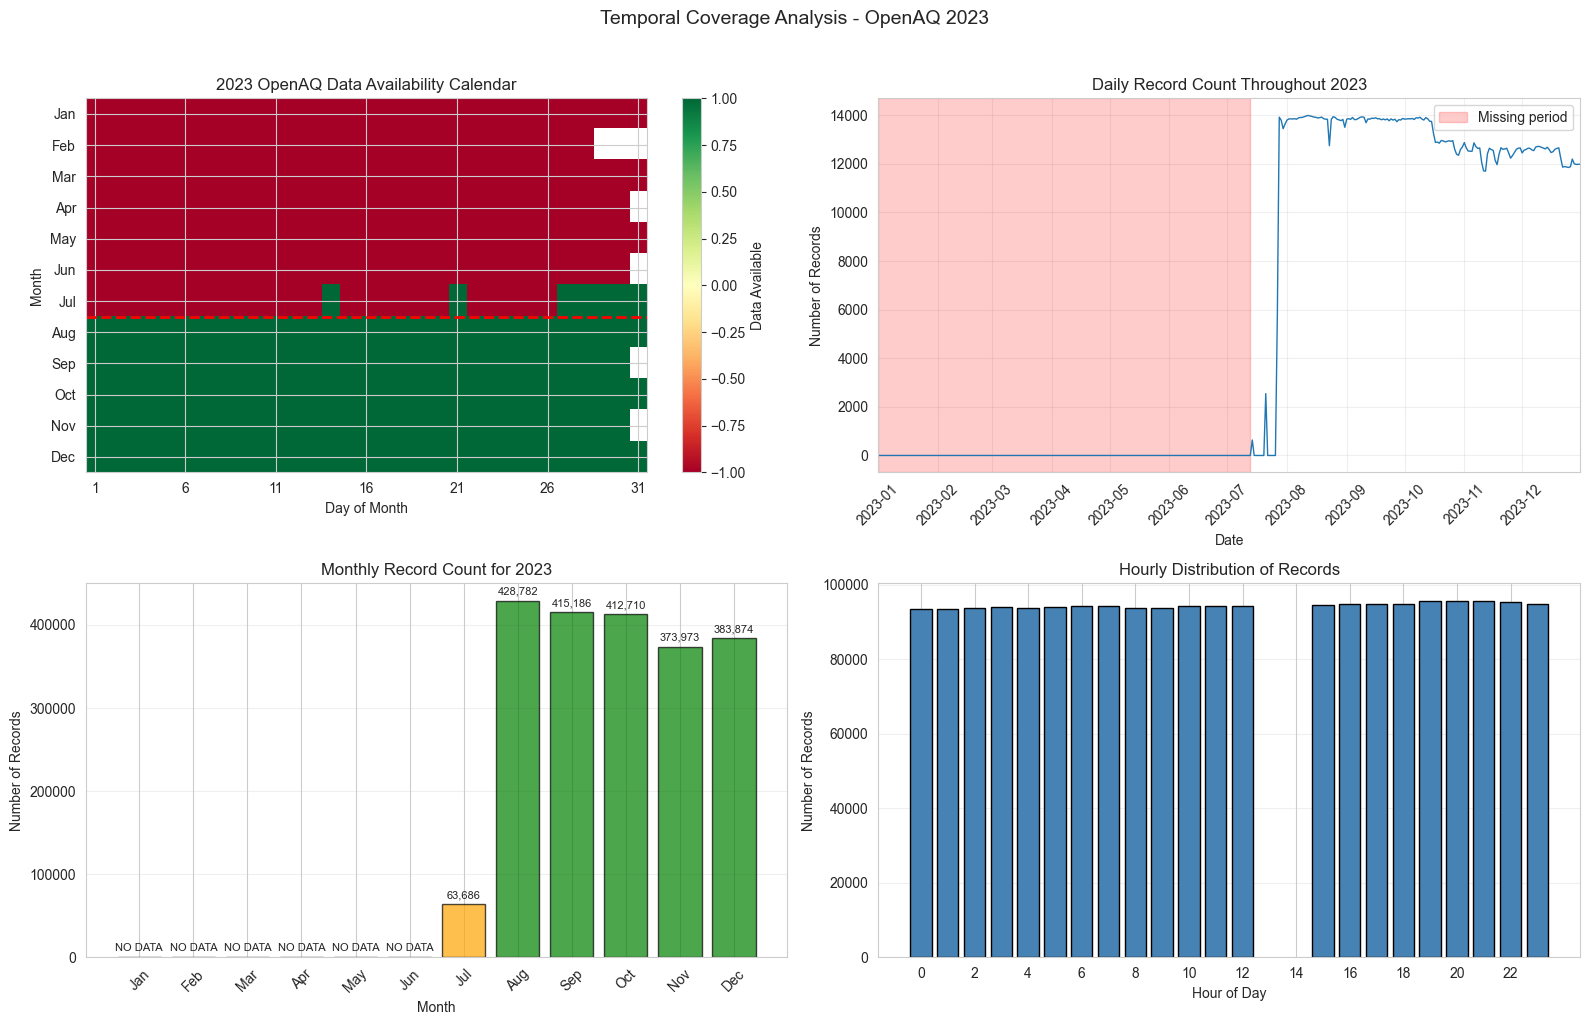

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

calendar_data = np.zeros((12, 31))
for date in all_dates_2023:
    month = date.month - 1
    day = date.day - 1
    if day < 31:
        calendar_data[month, day] = 1 if date in existing_dates else -1

calendar_data[calendar_data == 0] = np.nan

im = axes[0, 0].imshow(calendar_data, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
axes[0, 0].set_title('2023 OpenAQ Data Availability Calendar', fontsize=12)
axes[0, 0].set_xlabel('Day of Month')
axes[0, 0].set_ylabel('Month')
axes[0, 0].set_yticks(range(12))
axes[0, 0].set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0, 0].set_xticks(range(0, 31, 5))
axes[0, 0].set_xticklabels(range(1, 32, 5))
axes[0, 0].axhline(y=6.5, color='red', linewidth=2, linestyle='--', label='Data starts')
plt.colorbar(im, ax=axes[0, 0], label='Data Available')

date_range = pd.date_range('2023-01-01', '2023-12-31', freq='D')
daily_counts = df_2023.groupby('date').size().reindex(date_range.date, fill_value=0)
axes[0, 1].plot(daily_counts.index, daily_counts.values, linewidth=1)
axes[0, 1].set_title('Daily Record Count Throughout 2023', fontsize=12)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Records')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlim(date_range[0], date_range[-1])
axes[0, 1].axvspan(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-07-13'),
                   color='red', alpha=0.2, label='Missing period')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

monthly_coverage = df_2023.groupby(df_2023['timestamp'].dt.to_period('M')).size().reindex(all_months, fill_value=0)
colors = ['red' if i < 6 else 'orange' if i == 6 else 'green' for i in range(12)]
bars = axes[1, 0].bar(range(12), monthly_coverage.values, color=colors, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Monthly Record Count for 2023', fontsize=12)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Records')
axes[1, 0].set_xticks(range(12))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, monthly_coverage.values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
                    f'{val:,}' if val > 0 else 'NO DATA', ha='center', va='bottom', fontsize=8)

hourly_counts = df_2023.groupby(df_2023['timestamp'].dt.hour).size()
axes[1, 1].bar(hourly_counts.index, hourly_counts.values, color='steelblue', edgecolor='black')
axes[1, 1].set_title('Hourly Distribution of Records', fontsize=12)
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Records')
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Temporal Coverage Analysis - OpenAQ 2023', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 3. PM2.5 Data Analysis

In [8]:
pm25_columns = [col for col in df_2023.columns if 'pm25' in col.lower()]
print(f"PM2.5 columns found: {pm25_columns}")

missing_stats = pd.DataFrame({
    'Missing Count': df_2023[pm25_columns].isnull().sum(),
    'Missing %': (df_2023[pm25_columns].isnull().sum() / len(df_2023) * 100).round(2),
    'Available Count': df_2023[pm25_columns].notnull().sum(),
    'Available %': (df_2023[pm25_columns].notnull().sum() / len(df_2023) * 100).round(2)
})

print("\nPM2.5 Data Completeness:")
print("="*60)
display(missing_stats)

PM2.5 columns found: ['pm25_ugm3_mean', 'pm25_ugm3_min', 'pm25_ugm3_max', 'pm25_ugm3_count']

PM2.5 Data Completeness:


,Missing Count,Missing %,Available Count,Available %
pm25_ugm3_mean,440923,21.22,1637288,78.78
pm25_ugm3_min,440923,21.22,1637288,78.78
pm25_ugm3_max,440923,21.22,1637288,78.78
pm25_ugm3_count,0,0.00,2078211,100.00


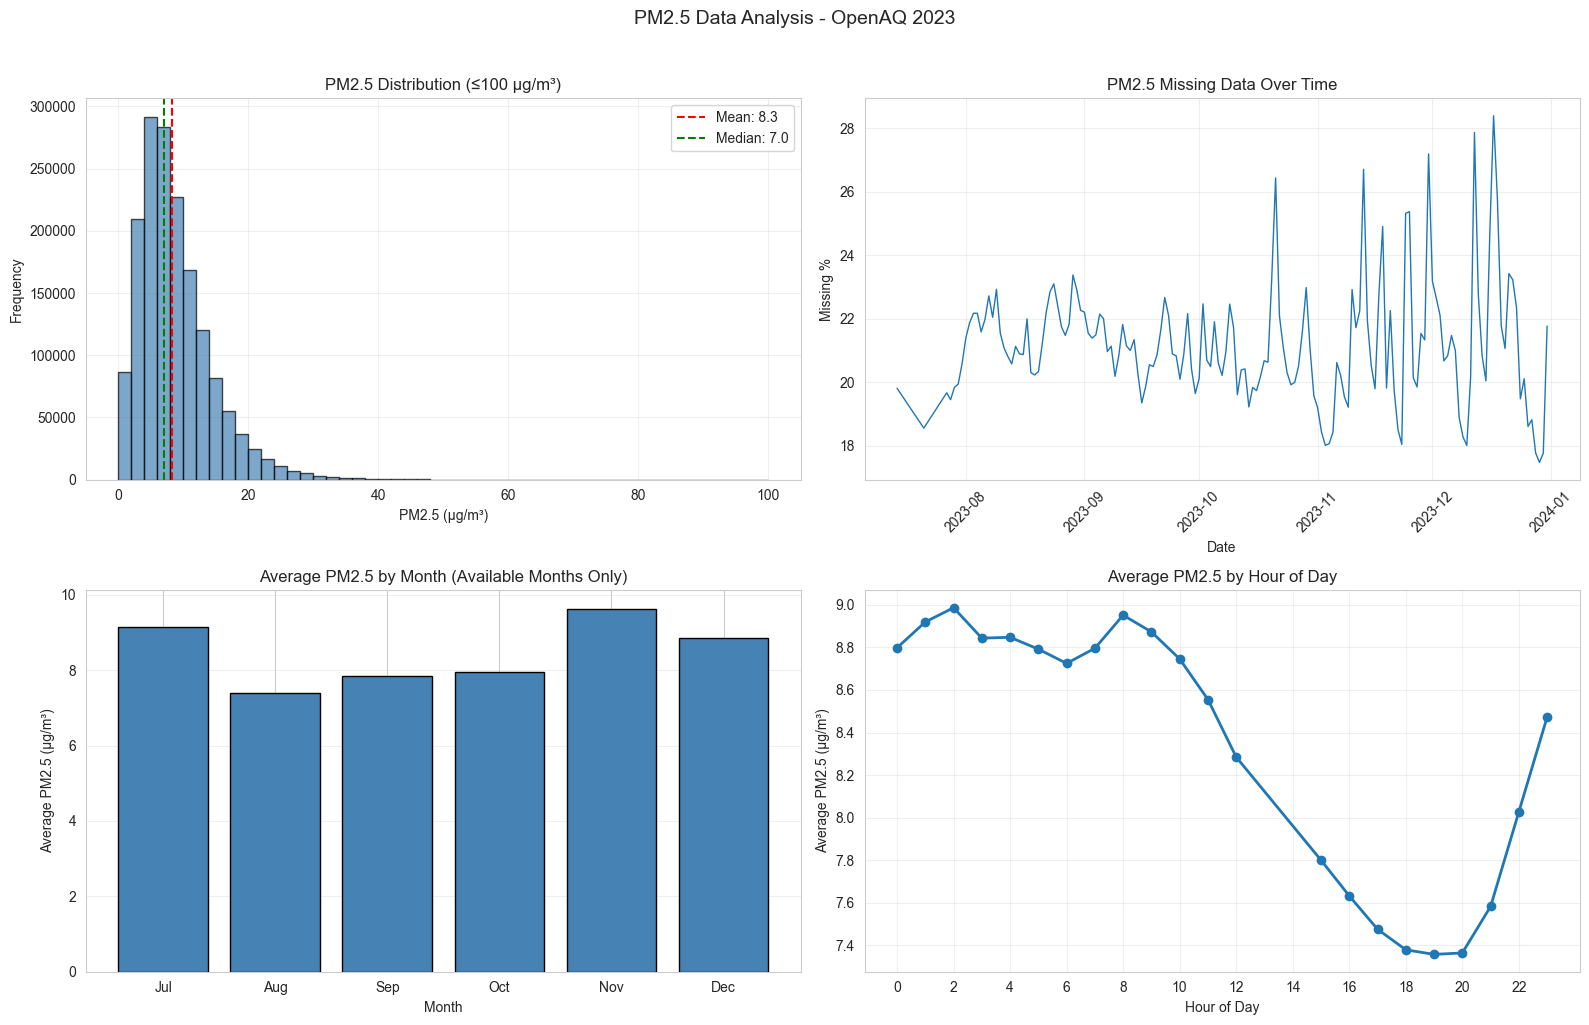

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

pm25_mean = df_2023['pm25_ugm3_mean'].dropna()
axes[0, 0].hist(pm25_mean[pm25_mean <= 100], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('PM2.5 (μg/m³)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('PM2.5 Distribution (≤100 μg/m³)')
axes[0, 0].axvline(pm25_mean.mean(), color='red', linestyle='--', label=f'Mean: {pm25_mean.mean():.1f}')
axes[0, 0].axvline(pm25_mean.median(), color='green', linestyle='--', label=f'Median: {pm25_mean.median():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

daily_pm25_missing = df_2023.groupby('date')['pm25_ugm3_mean'].apply(lambda x: x.isnull().mean() * 100)
axes[0, 1].plot(daily_pm25_missing.index, daily_pm25_missing.values, linewidth=1)
axes[0, 1].set_title('PM2.5 Missing Data Over Time', fontsize=12)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Missing %')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

monthly_pm25 = df_2023.groupby(df_2023['timestamp'].dt.month)['pm25_ugm3_mean'].mean()
available_months = monthly_pm25.index
axes[1, 0].bar(available_months, monthly_pm25.values, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average PM2.5 (μg/m³)')
axes[1, 0].set_title('Average PM2.5 by Month (Available Months Only)')
axes[1, 0].set_xticks(available_months)
axes[1, 0].set_xticklabels([['', '', '', '', '', '', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][m-1] for m in available_months])
axes[1, 0].grid(True, alpha=0.3, axis='y')

hourly_pm25 = df_2023.groupby(df_2023['timestamp'].dt.hour)['pm25_ugm3_mean'].mean()
axes[1, 1].plot(hourly_pm25.index, hourly_pm25.values, marker='o', linewidth=2)
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Average PM2.5 (μg/m³)')
axes[1, 1].set_title('Average PM2.5 by Hour of Day')
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('PM2.5 Data Analysis - OpenAQ 2023', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 4. Geographic Coverage

In [10]:
hex_locations = df_2023[['h3_index_res8', 'h3_lat_res8', 'h3_lon_res8']].drop_duplicates()
print(f"Geographic Coverage:")
print("="*60)
print(f"Unique hexagons: {len(hex_locations):,}")
print(f"Latitude range: {hex_locations['h3_lat_res8'].min():.2f} to {hex_locations['h3_lat_res8'].max():.2f}")
print(f"Longitude range: {hex_locations['h3_lon_res8'].min():.2f} to {hex_locations['h3_lon_res8'].max():.2f}")

hex_data_counts = df_2023.groupby('h3_index_res8').agg({
    'pm25_ugm3_mean': ['count', 'mean', lambda x: x.notna().mean()]
}).reset_index()
hex_data_counts.columns = ['h3_index_res8', 'record_count', 'pm25_mean', 'pm25_coverage']
hex_with_counts = hex_locations.merge(hex_data_counts, on='h3_index_res8')

print(f"\nRecords per hexagon:")
print(f"  Mean: {hex_with_counts['record_count'].mean():.0f}")
print(f"  Median: {hex_with_counts['record_count'].median():.0f}")
print(f"  Min: {hex_with_counts['record_count'].min()}")
print(f"  Max: {hex_with_counts['record_count'].max()}")

print(f"\nPM2.5 data completeness per hexagon:")
print(f"  Mean: {hex_with_counts['pm25_coverage'].mean():.1%}")
print(f"  Median: {hex_with_counts['pm25_coverage'].median():.1%}")

Geographic Coverage:
Unique hexagons: 638
Latitude range: 24.34 to 45.12
Longitude range: 124.16 to 144.37

Records per hexagon:
  Mean: 2566
  Median: 3270
  Min: 0
  Max: 3458

PM2.5 data completeness per hexagon:
  Mean: 78.4%
  Median: 96.7%


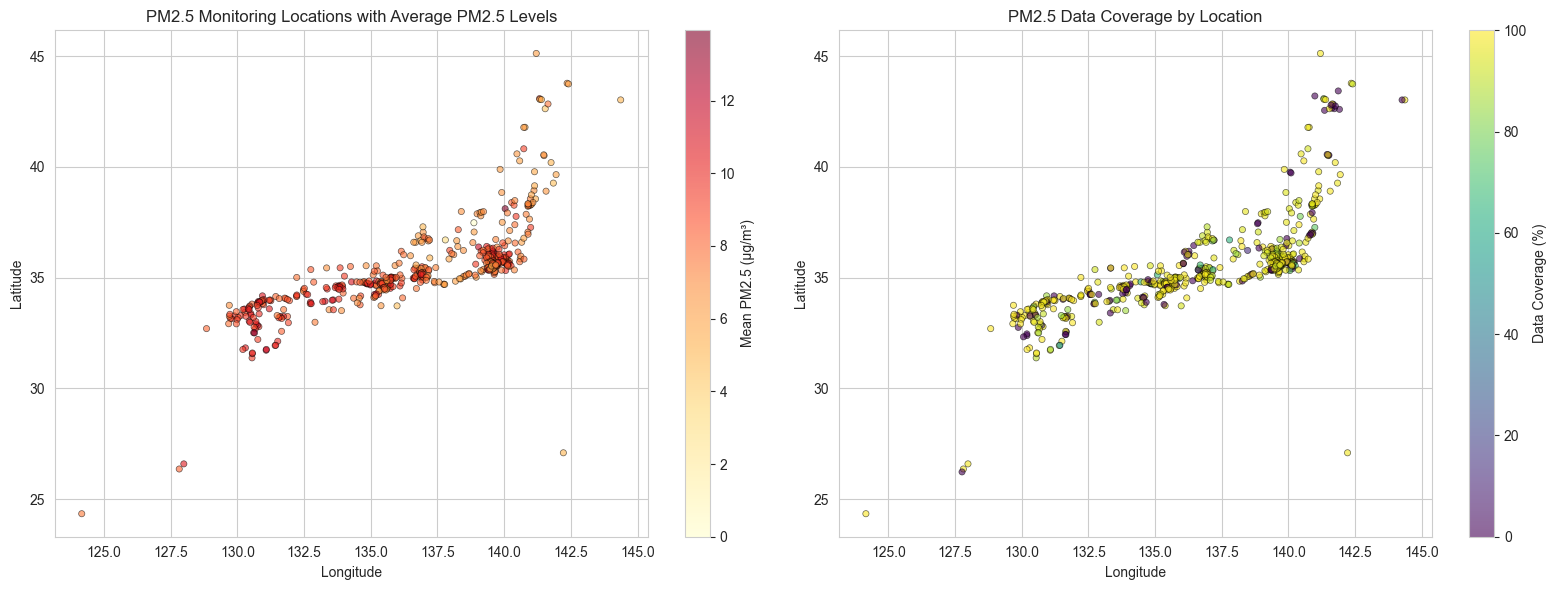

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter = axes[0].scatter(hex_with_counts['h3_lon_res8'],
                         hex_with_counts['h3_lat_res8'],
                         c=hex_with_counts['pm25_mean'],
                         cmap='YlOrRd', s=20, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('PM2.5 Monitoring Locations with Average PM2.5 Levels')
plt.colorbar(scatter, ax=axes[0], label='Mean PM2.5 (μg/m³)')

scatter2 = axes[1].scatter(hex_with_counts['h3_lon_res8'],
                          hex_with_counts['h3_lat_res8'],
                          c=hex_with_counts['pm25_coverage']*100,
                          cmap='viridis', s=20, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('PM2.5 Data Coverage by Location')
plt.colorbar(scatter2, ax=axes[1], label='Data Coverage (%)')

plt.tight_layout()
plt.show()

## 5. Statistical Summary

In [12]:
print("PM2.5 Statistical Summary:")
print("="*60)
display(df_2023[pm25_columns].describe())

PM2.5 Statistical Summary:


,pm25_ugm3_mean,pm25_ugm3_min,pm25_ugm3_max,pm25_ugm3_count
count,1637288.00,1637288.00,1637288.00,2078211.00
mean,8.32,8.32,8.33,0.79
std,6.59,6.59,6.59,0.41
min,0.00,0.00,0.00,0.00
25%,4.00,4.00,4.00,1.00
50%,7.00,7.00,7.00,1.00
75%,11.00,11.00,11.00,1.00
max,3089.00,3089.00,3089.00,2.00


In [ ]:
print("OPENAQ 2023 DATA QUALITY SUMMARY")
print("="*60)

print("\n📊 DATASET OVERVIEW:")
print(f"   Total records: {len(df_2023):,}")
print(f"   Time period: {df_2023['timestamp'].min().date()} to {df_2023['timestamp'].max().date()}")
print(f"   Unique locations (hexagons): {df_2023['h3_index_res8'].nunique()}")
print(f"   Temporal resolution: Hourly")

print("\n⚠️ TEMPORAL COVERAGE:")
print(f"   Days with data: {len(existing_dates)}/365 ({len(existing_dates)/365*100:.1f}%)")
print(f"   ❌ MISSING: January 1 - July 13, 2023 (194 days)")
print(f"   ✓ Available: July 14 - December 31, 2023 (171 days)")

print("\n📈 PM2.5 STATISTICS (Available Period):")
print(f"   Mean: {pm25_mean.mean():.2f} μg/m³")
print(f"   Median: {pm25_mean.median():.2f} μg/m³")
print(f"   Std Dev: {pm25_mean.std():.2f} μg/m³")
print(f"   Min: {pm25_mean.min():.2f} μg/m³")
print(f"   Max: {pm25_mean.max():.2f} μg/m³")
print(f"   95th percentile: {pm25_mean.quantile(0.95):.2f} μg/m³")

print("\n✅ DATA COMPLETENESS (Within Available Period):")
for col in pm25_columns:
    completeness = df_2023[col].notna().mean() * 100
    print(f"   {col}: {completeness:.1f}%")

print("\n🔴 CRITICAL FINDING:")
print("   The OpenAQ dataset is missing the first half of 2023 (Jan-Jul 13).")
print("   This explains why the enriched PM2.5 dataset only contains data")
print("   from July 14, 2023 onwards, despite having complete weather and")
print("   traffic data for the entire year.")

OPENAQ 2023 DATA QUALITY SUMMARY

📊 DATASET OVERVIEW:
   Total records: 2,078,211
   Time period: 2023-07-14 to 2023-12-31
   Unique locations (hexagons): 638
   Temporal resolution: Hourly

⚠️ TEMPORAL COVERAGE:
   Days with data: 160/365 (43.8%)
   ❌ MISSING: January 1 - July 13, 2023 (194 days)
   ✓ Available: July 14 - December 31, 2023 (171 days)

📈 PM2.5 STATISTICS (Available Period):
   Mean: 8.32 μg/m³
   Median: 7.00 μg/m³
   Std Dev: 6.59 μg/m³
   Min: 0.00 μg/m³
   Max: 3089.00 μg/m³
   95th percentile: 19.00 μg/m³

✅ DATA COMPLETENESS (Within Available Period):
   pm25_ugm3_mean: 78.8%
   pm25_ugm3_min: 78.8%
   pm25_ugm3_max: 78.8%
   pm25_ugm3_count: 100.0%

🔴 CRITICAL FINDING:
   The OpenAQ dataset is missing the first half of 2023 (Jan-Jul 13).
   This explains why the enriched PM2.5 dataset only contains data
   from July 14, 2023 onwards, despite having complete weather and
   traffic data for the entire year.


: 